<a href="https://colab.research.google.com/github/GustavoBD-Dev/ThesisProjectDDRUCNN/blob/main/ThesisProjectDDRUCNN_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deteccion de Retinopatia Diabetica utilizando Redes Neuronales Convolucionales Version 2 (imagenes recortadas de Kaggle)

## Lectura de CSV de set de datos

In [23]:
# Importamos todas las librerias necesarias
import numpy as np
import pandas as pd
import os
import cv2
import csv
import matplotlib.pyplot as plt
from PIL import image
#from google.colab import files # load file

ImportError: cannot import name 'image' from 'PIL' (C:\Users\gusta\AppData\Roaming\Python\Python310\site-packages\PIL\__init__.py)

Realizamos la la carga del archivo `trainLabels_cropped.csv` en el cual se encuentran la informacion del dataset de los datos.

In [2]:
# Carga del archivo csv
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving trainLabels_cropped.csv to trainLabels_cropped.csv
User uploaded file "trainLabels_cropped.csv" with length 899292 bytes


## Analisis de datos

Con la ayuda de la libreria **pandas** podemos realizar una lectura del archivo `csv`, aqui se muestra la información en un DataFrame.

In [3]:
# Lectura del archivo csv
data = pd.read_csv('trainLabels_cropped.csv')
# Mostramos encabezado del archivo
data.head()

,Unnamed: 0,Unnamed: 0.1,image,level
0,0,0,10_left,0
1,1,1,10_right,0
2,2,2,13_left,0
3,3,3,13_right,0
4,4,4,15_left,1


Como se muestra en el encabezado del DataFrame, se tienen cuatro columnas, de las cuales nos interesan la columna tres y cuatro, la columna tres contiene el nombre de la imagen `image` y la columna cuatro `level` el nivel de RD que se le ha etiquetado.

Mostramos el total de imagenes del set de datos, contemplando todos los niveles de RD.

In [4]:
data['level'].count()

35108

Ahora realizamos un conteo del total de datos o imagenes por cada nivel de RD.

0    25802
2     5288
1     2438
3      872
4      708
Name: level, dtype: int64

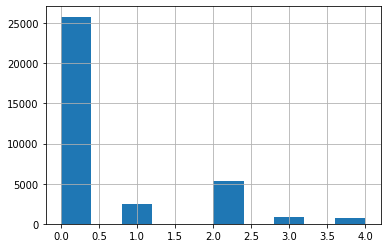

In [5]:
data['level'].hist()
data['level'].value_counts()

## Balanceo de datos

Como se puede observar en el histograma del analisis de datos, se tiene un desbalanceo de datos, pues se tiene un numero mayor de imagenes en el nivel 0 de RD, es decir son imagenes de retina sin presencia. Para lo cual unicamente tomaremos una cierta cantidad de imagenes, en este caso 708 imagenes de cada clase. Esta cifra se debe a que la clase con nivel 4 de RD del set de datos contiene ese numero de imagenes.

In [6]:
# creamos un diccionario en el cual se almacenen el nivel de RD como clave y el total de imagenes como el valor
levelsRD = {
    'level_0' : 0,
    'level_1' : 0,
    'level_2' : 0,
    'level_3' : 0,
    'level_4' : 0,
}

# arreglos para almacenar los datos
data_images = [] # nombre de las imagenes
levelimages = [] # etiqueta con el nivel de RD

# para cada nivel de RD obtenemos las imagenes correspondientes
for level_RD in [0, 1, 2, 3, 4]:
    # Recorremos el DataFrame, se toma como validacion el atributo 'level' de los datos
    for i in data.index:
        # Comparamos el nivel de RD del ciclo con el de la etiqueta
        if data['level'][i] == level_RD:
            # si el total de imagenes es menor a la requerida
            if levelsRD['level_{}'.format(level_RD)] < 708:
                # Obtenemos el nombre de la imagen y se agrega a la lista
                data_images.append(data['image'][i])
                # agregamos el nivel de RD
                levelimages.append(level_RD)
                # incrementamos el total de datos de la clase en el diccionario
                levelsRD['level_{}'.format(level_RD)] += 1


with open('dataBalanced.csv', 'w+', newline = '') as file:
    writer = csv.writer(file)
    writer.writerow(['image','level', 'image_name'])
    for i in range(len(data_images)):
        writer.writerow([data_images[i], levelimages[i], '{}.jpeg'.format(data_images[i])])

print('Balanceo terminado')
print(len(data_images))
print(levelsRD)


Balanceo terminado
3540
{'level_0': 708, 'level_1': 708, 'level_2': 708, 'level_3': 708, 'level_4': 708}


Verificamos el archivo de `csv` para analizar los datos.

In [7]:
# lectura del archivo csv 
data_clean = pd.read_csv('dataBalanced.csv')
# Mostramos el encabezado del archivo
data_clean.head()

,image,level,image_name
0,10_left,0,10_left.jpeg
1,10_right,0,10_right.jpeg
2,13_left,0,13_left.jpeg
3,13_right,0,13_right.jpeg
4,17_left,0,17_left.jpeg


Se tiene una DataFrame con 708 nombre de imagenes de cada clase, ahora para corroborar los datos realizamos un conteo de cada uno de las etiquetas con los niveles de RD, mostramos una grafica.

0    708
1    708
2    708
3    708
4    708
Name: level, dtype: int64

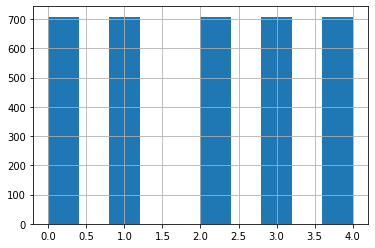

In [8]:
data_clean['level'].hist()
data_clean['level'].value_counts()

## Visualizacion de los datos (imagenes)

Mostramos las primeras 5 imagenes de cada clase

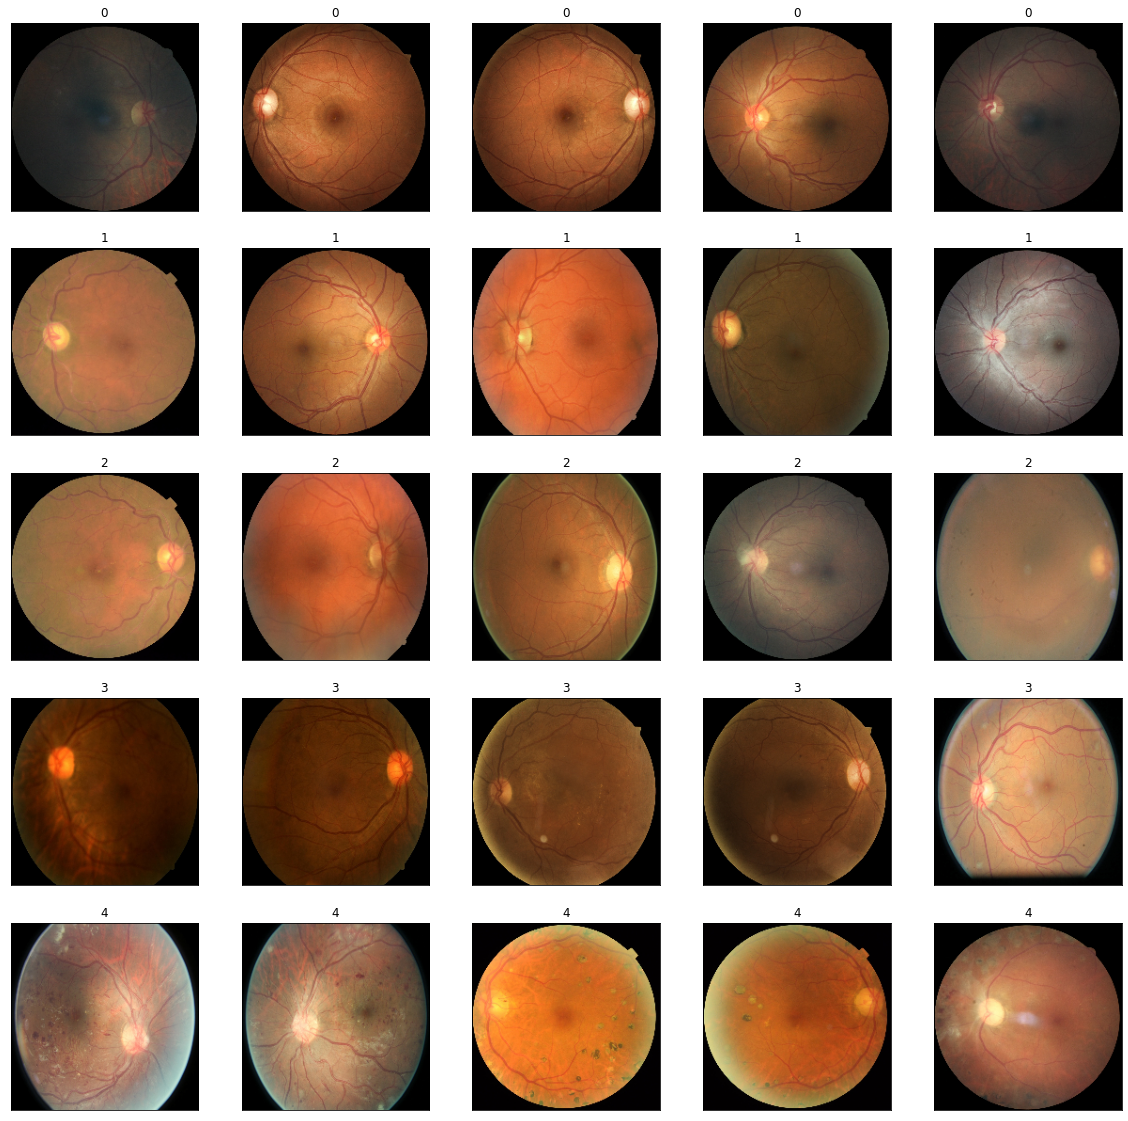

In [9]:
plt.figure(figsize=(20,20))
# dimension de las imagenes a mostrar
TAMANIO_IMG = 200

showImages = [1,2,3,4,5,
    708,709,710,711,712,
    1416,1417,1418,1419,1420,
    2124,2125,2126,2127,2128,
    2832,2833,2834,2835,2836]

for i in range(0, 25):
    image = cv2.imread('C:\\Users\\gusta\\Desktop\\ThesisProject\\resized_train_cropped\\resized_train_cropped\\' + data_clean['image_name'][showImages[i]])
    image = cv2.resize(image, (TAMANIO_IMG, TAMANIO_IMG))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(5, 5, i+1)
    plt.title(data_clean['level'][showImages[i]])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)

Obtenemos las imagenes y se almacenaran en el arreglo `images` y las etiquetas que se almacenaran en el arreglo `labels`

In [21]:
images = []
labels = []

for i in data_clean.index:
    # generamos el directorio de la imagen
    filepath = 'C:\\Users\\gusta\\Desktop\\ThesisProject\\resized_train_cropped\\resized_train_cropped\\{}'.format(data_clean['image_name'][i])
    # realizamos la lectura de la imagen
    image = plt.imread(filepath)
    # Agregamos la imagen al arreglo
    images.append(image)
    # agregamos la etiqueta correspondiente
    labels = data_clean['level'][i]

In [14]:
y

array(4, dtype=int64)